In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
# Apply a multi class classification of the samples
# regarding an optimized theta
# ToDo
def ClassifyMultiClass(theta,X,th,nmodels):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	y[y >= th] = 1
	y[y < th] = 0
	X = np.delete(X,0,axis=1)
	return y

# Apply the binary classification of the samples
# regarding an optimized theta
def Classify(theta,X,th):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	y[y >= th] = 1
	y[y < th] = 0
	X = np.delete(X,0,axis=1)
	return y

def Predict(theta,X):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	X = np.delete(X,0,axis=1)
	return y

'''
 Since we are dealing with logistic regression,
 the hypothesis is defined as:

                    1
       F(x) = --------------
                1 + exp^(-x)

 However, its implementation may result in overflow
 if x is too large, then, the version implemented 
 here is more stable with similar results.
'''
def Hypothesis(theta,X):
	cX = np.copy(X)
	cX[X > 0] = -cX[X > 0]
	h = 1 / (1 + np.exp(np.dot(cX,theta)))
	return h

In [7]:
#-----------------------------------
#   Evaluation Metrics and Loss Functions
#-----------------------------------

def CrossEntropyLoss(h,y):
	return np.multiply(np.log(h),y) + np.multiply((1-np.log(h)),(1-y))

def Cost(theta,X,y):
	h = Hypothesis(theta,X)
	cost = CrossEntropyLoss(h,y)
	mean_cost = cost.sum()/-y.shape[0]
	return mean_cost

def AccuracyScore(predY,Y):
	TP = ((predY == Y) & (predY == 1.)).sum()
	TN = ((predY == Y) & (predY == 0.)).sum()	
	acc = (TP + TN) / predY.shape[0]
	return acc

def PrecisionScore(predY,Y):
	TP = ((predY == Y) & (predY == 1)).sum()
	FP = ((predY != Y) & (predY == 1)).sum()
	precision = TP / (TP + FP)
	return precision

def RecallScore(predY, Y):
	TP = ((predY == Y) & (predY == 1)).sum()
	FN = ((predY != Y) & (predY == 0)).sum()
	recall = TP / (TP + FN)
	return recall

def FbScore(predY, Y, beta):
	precision = PrecisionScore(predY,Y)
	recall = RecallScore(predY,Y)
	fscore = (1 + beta*beta)*((precision*recall)/((beta*beta*precision)+recall))
	return fscore

In [4]:
#-----------------------------------
#   Gradient Descent
#-----------------------------------

def BGD(X,y,alpha,iterations):

	X = np.insert(X,0,1,axis=1)

	nsamples = X.shape[0]
	nfeatures = X.shape[1]
	theta = np.zeros(nfeatures)
	J=[]	

	for i in range(iterations):

		h = Hypothesis(theta,X)

		error = h - y

		grad = np.dot(X.transpose(),error)/nsamples

		theta = theta - alpha*grad

		J.append(Cost(theta,X,y))		

	X = np.delete(X,0,axis=1)

	plt.plot(J)
	plt.ylabel('Error')
	plt.xlabel('iterations')
	plt.show()

	return theta,J[iterations-1]

[[  34   34   34]
 [  45   45   45]
 [  88   88   88]
 ...
 [9200 9200 9200]
 [2800 2800 2800]
 [4000 4000 4000]]

--- X
[[  34   34   34]
 [  45   45   45]
 [  88   88   88]
 ...
 [9200 9200 9200]
 [2800 2800 2800]
 [4000 4000 4000]]

--- y
[0. 0. 0. ... 1. 1. 1.]


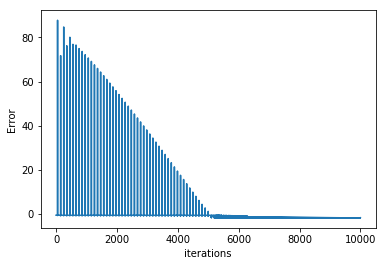


--- Theta
[-2.81974846  0.00393608  0.00393608  0.00393608]

--- Error
-1.6520852565401747

--- Hypothesis
[1.         1.         1.         1.         0.99999977 1.
 1.         0.99998707 0.99797821 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99992834 1.         0.96432299 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99725365 1.         1.         1.
 0.06792505 1.         0.99870824 1.         1.         0.99999994
 0.99481655 1.         0.94703133 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 1.         1.         1.         0.99974047 1.         1.
 1.         1.         1.         1.         1.   

In [10]:
#-----------------------------------
#   Logistic Regression - Toy Example
#-----------------------------------

size=5000
size2=size//2
size10=size//10
size102=size10//2
X = np.random.randint(low=1,high=99, size=(size,1))
X = np.concatenate((X,X,X),axis=1)
X = np.multiply(X,np.concatenate((np.full((size2,1),1),np.full((size2,1),100))))
print(X)
y = np.empty((size))
y[X[:,1] <= 99]=0
y[X[:,1] >= 100]=1

print("\n--- X")
print(X)
print("\n--- y")
print(y)

theta,error = BGD(X,y,0.001,10000)
print("\n--- Theta")
print(theta)
print("\n--- Error")
print(error)


X_val = np.random.randint(low=1,high=9900, size=(size10,1))
X_val = np.concatenate((X_val,X_val,X_val),axis=1)
y_val = np.empty((size10))
y_val[X_val[:,1] <= 99]=0
y_val[X_val[:,1] >= 100]=1


h = Predict(theta,X_val)
print("\n--- Hypothesis")
print(h)
predY = Classify(theta,X_val,0.7)
print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

acc = AccuracyScore(predY,y_val)
pre = PrecisionScore(predY,y_val)
recall = RecallScore(predY,y_val)
f = FbScore(predY,y_val,1)

print("\n--- Accuracy")
print(acc)
print("\n--- Precision")
print(pre)
print("\n--- Recall")
print(recall)
print("\n--- F1Score")
print(f)


In [ ]:
#-----------------------------------
# MultiClass Classification - Toy Example
#-----------------------------------

# Not ready, still has a bug

size=500
size4=size//4
size10=size//10
size104=size10//4
X = np.random.randint(low=0,high=7999, size=(size,1))
X = np.concatenate((X,X,X),axis=1)
y = np.empty((size),dtype=np.float128)
y[X[:,1] <= 1999]=0
y[((X[:,1] <= 3999) & (X[:,1]>1999))]=1
y[((X[:,1] <= 5999) & (X[:,1]>3999))]=2
y[X[:,1]>5999]=3

classes = np.unique(y)
print(classes)
theta = {}

for c in classes:

	cy = np.copy(y)

	cy[y != c] = 0
	cy[y == c] = 1

	theta[c],acc = BGD(X,cy,0.001,500)

X_val = np.random.randint(low=1,high=7999, size=(size10,1))
X_val = np.concatenate((X_val,X_val,X_val),axis=1)
y_val = np.empty((size10))
y_val[X_val[:,1] <= 1999]=0
y_val[((X_val[:,1] <= 3999) & (X_val[:,1]>1999))]=1
y_val[((X_val[:,1] <= 5999) & (X_val[:,1]>3999))]=2
y_val[X_val[:,1]>5999]=3

print("\n--- Theta")
print(theta)

predY,pred = ClassifyMultiClass(theta,X_val)
print("\n--- Hypothesis")
print(pred)
print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

acc = AccuracyScore(predY,y_val)
pre = PrecisionScore(predY,y_val)
recall = RecallScore(predY,y_val)
f = FbScore(predY,y_val,1)

print("\n--- Accuracy")
print(acc)
print("\n--- Precision")
print(pre)
print("\n--- Recall")
print(recall)
print("\n--- F1Score")
print(f)